In [57]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [58]:

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [59]:
X_test.shape

(10000, 32, 32, 3)

In [60]:
y_train.shape

(50000, 1)

In [61]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [62]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [63]:
y_test = y_test.reshape(-1,)

In [64]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [65]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

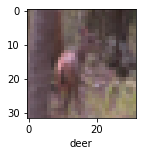

In [85]:
plot_sample(X_train, y_train, 399)

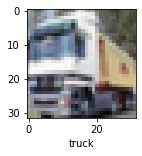

In [67]:

plot_sample(X_train, y_train, 1)

In [68]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [69]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [70]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.7038 - accuracy: 0.3781
Epoch 2/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1434 - accuracy: 0.5981
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9932 - accuracy: 0.6559
Epoch 4/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8837 - accuracy: 0.6913
Epoch 5/5
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8181 - accuracy: 0.7181


In [72]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9388 - accuracy: 0.6753


[0.9387789964675903, 0.6753000020980835]

In [73]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.18735433e-03, 3.06637259e-04, 2.89728213e-02, 7.65894234e-01,
        1.07302442e-02, 1.76129878e-01, 5.02873305e-03, 6.56589807e-04,
        1.10088103e-02, 8.48167037e-05],
       [1.31614208e-02, 6.22263670e-01, 4.72354586e-05, 3.90833156e-05,
        2.25613876e-05, 1.58320254e-05, 1.14494096e-05, 1.05562583e-06,
        3.59744340e-01, 4.69348347e-03],
       [3.64344120e-02, 2.17725918e-01, 3.55116976e-03, 2.53196582e-02,
        5.86845120e-03, 4.31515323e-03, 1.60890655e-03, 4.31633415e-03,
        6.91164017e-01, 9.69601143e-03],
       [7.81449080e-01, 9.65019166e-02, 1.39226681e-02, 2.03646421e-02,
        1.79892275e-02, 1.86061638e-03, 2.98738806e-03, 4.12863074e-03,
        5.94327599e-02, 1.36296288e-03],
       [2.41952912e-05, 4.58952454e-05, 7.64863566e-02, 3.61920148e-02,
        3.70468557e-01, 2.51797736e-02, 4.90905344e-01, 3.38764075e-04,
        3.46417830e-04, 1.25902125e-05]], dtype=float32)

In [74]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [75]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

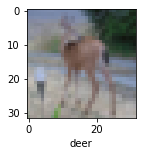

In [80]:
plot_sample(X_test, y_test,100)

In [77]:
classes[y_classes[100]]

'dog'

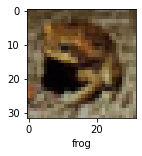

In [78]:
plot_sample(X_test, y_test,300)

In [79]:
classes[y_classes[300]]

'frog'

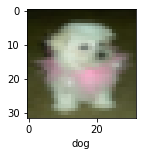

In [82]:
plot_sample(X_test, y_test,3000)

In [83]:
classes[y_classes[3000]]

'dog'